In [105]:
from KNearestNeighbors import KnnClassifier, KnnRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix

In [106]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

### Classification problem

In [107]:
filename = "datingTestSet.txt"
colName, returnMatX, classLabelVector = file2matrix(filename, header = False, index_y = -1)

In [108]:
distribution ={}
for x in classLabelVector:
    distribution[x] = distribution.get(x,1)+1

distribution   

{'largeDoses': 328, 'smallDoses': 332, 'didntLike': 343}

In [109]:
numericClass = []
for x in classLabelVector:
    if x == 'largeDoses':
        numericClass.append(0)
    elif x== 'smallDoses':
        numericClass.append(1)
    else:
        numericClass.append(2)

In [110]:
df = np.hstack((returnMatX, np.array(numericClass).reshape(-1,1)))

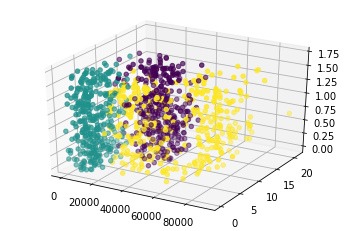

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df[:,0], df[:,1], df[:,2], c=df[:,3]);

In [112]:
def scale_data(dataset,method = "standard"):
    if method == "standard":
        meanVal = np.mean(dataset,0)
        stdVal = np.std(dataset,0)
        standardDataset = np.zeros((dataset.shape))
        for i in range(dataset.shape[1]):
            standardDataset[:,i] = np.array([(x-meanVal[i])/stdVal[i] for x in dataset[:,i]]) 
        return standardDataset
    elif method == "normal":
        minVal = np.min(dataset,0)
        maxVal = np.max(dataset,0)
        rangeVal = maxVal - minVal
        normDataset = np.zeros((dataset.shape))
        for i in range(dataset.shape[1]):
            normDataset[:,i] = np.array([(x-minVal[i])/rangeVal[i] for x in dataset[:,i]])
        return normDataset
    else:
        raise Exception("There are only two methods: standard and normal") 

In [113]:
scaledMat = scale_data(returnMatX,method="normal")
scaledMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(scaledMat, np.array(numericClass), test_size=0.33)

In [115]:
## confusion matrix plot
def plot_cm(y, y_est):
    cm = confusion_matrix(y, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    #plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

model's score is: 0.96


array([[ 99,   4,   1],
       [  2, 112,   2],
       [  2,   1, 107]], dtype=int64)

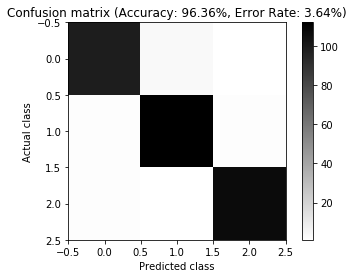

In [119]:
model = Knn(5)
model.fit(X_train, y_train, "jaccard")
print("model's score is:", np.round(model.score(),2))
pred = model.prediction(X_test)
plot_cm(y_test,pred)
confusion_matrix(y_test, pred)

### Regression problem:

In [120]:
filename = "abalone.txt"
colName, X, y = file2matrix(filename, header = False, index_y = -1)
# convert string list to integer array
y = np.array([int(numeric_string) for numeric_string in y])

In [121]:
## Accuracy measures 
def compute_error(trues,predicted):
    corr=np.corrcoef(predicted,trues)[0,1]
    mae=np.mean(np.abs(predicted-trues))
    rae=np.sum(np.abs(predicted-trues))/np.sum(np.abs(trues-np.mean(trues)))
    rmse=np.sqrt(np.mean((predicted-trues)**2))
    r2=max(0,1-np.sum((trues-predicted)**2)/np.sum((trues-np.mean(trues))**2))
    return corr,mae,rae,rmse,r2

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [124]:
model = KnnRegressor(5)
model.fit(X_train, y_train)
print("model's score is:", np.round(model.score(),2))
pred = model.prediction(X_test)
corr, MAE, RAE, RMSE, R2 = compute_error(y_test,pred)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" %(corr, MAE,RMSE, R2))

model's score is: 0.67
CorrCoef: 0.734
MAE: 1.536
RMSE: 2.205
R2: 0.537


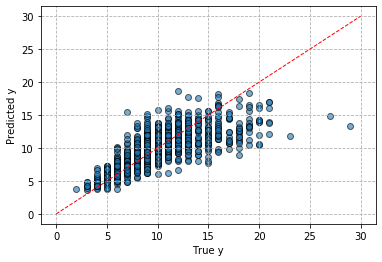

In [140]:
plt.scatter(y_test,pred, alpha=.6, edgecolors="k")
plt.plot(np.linspace(0,30,100),np.linspace(0,30,100),"r--",linewidth=1)
plt.grid(linestyle="--")
plt.xlabel("True y")
plt.ylabel("Predicted y");